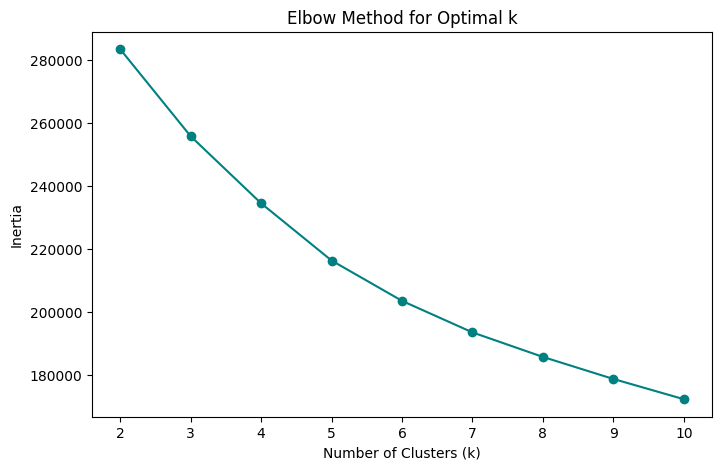

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/spotify dataset.csv')

# Select features for clustering
features = ["danceability", "energy", "loudness", "speechiness", "acousticness",
            "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="-", color="teal")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


In [3]:
from sklearn.metrics import silhouette_score

# Assuming you have fitted your KMeans model and have the labels
kmeans = KMeans(n_clusters=3, random_state=42)  # Example with 3 clusters
kmeans.fit(df_scaled)
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.126012725622668


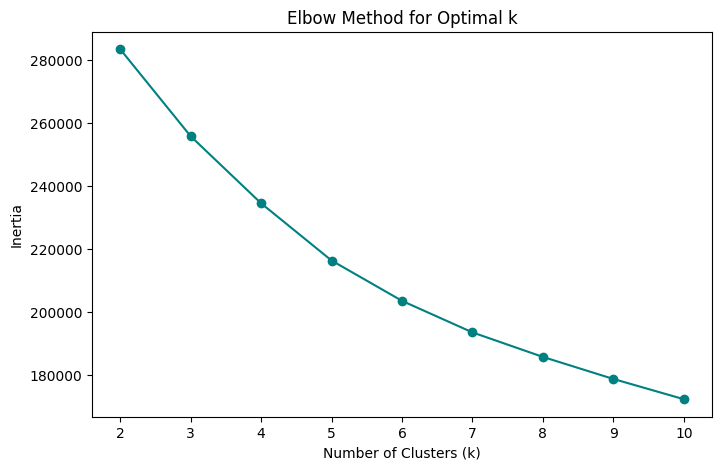

Silhouette Score for 3 clusters: 0.13


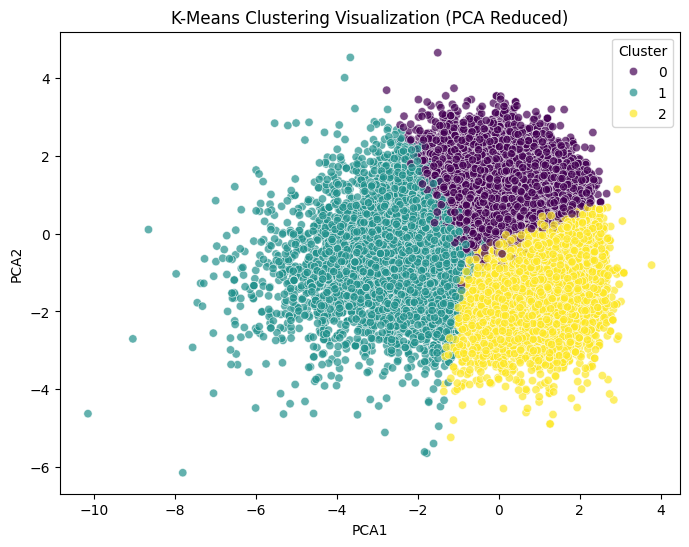

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("spotify dataset.csv")

# Select numerical features for clustering
features = ["danceability", "energy", "loudness", "speechiness", "acousticness",
            "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Elbow Method to determine the optimal number of clusters
inertia = []
k_range = range(2, 11)  # Testing k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o", linestyle="-", color="teal")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Choose the optimal k (based on elbow method, assume k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df["Cluster"])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.2f}")

# Visualizing clusters using PCA (reducing dimensions to 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df["PCA1"] = df_pca[:, 0]
df["PCA2"] = df_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA Reduced)")
plt.show()
